In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

from ipywidgets import interact
from ipywidgets import interact_manual

In [2]:
dataset = pd.read_csv("startup_funding.csv")
dataset.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [3]:
dataset.columns = ["SNo", "Date", "StartupName", "IndustryVertical", "SubVertical",
                        "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]

def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")

for col in ["StartupName", "IndustryVertical", "SubVertical", "City", 
            "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]:
    dataset[col] = dataset[col].apply(lambda x: clean_string(x))
    

In [4]:
dataset.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [5]:
dataset.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks'],
      dtype='object')

In [6]:
print("Size of data", dataset.shape)

Size of data (3044, 10)


# Data Cleaning

In [8]:
import warnings
warnings.filterwarnings('ignore')

total = dataset.isnull().sum().sort_values(ascending = False)

percent = ((dataset.isnull().sum()/dataset.isnull().count())*100).sort_values(ascending = False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])

missing_data

,Total,Percent %
SNo,0,0.0
Date,0,0.0
StartupName,0,0.0
IndustryVertical,0,0.0
SubVertical,0,0.0
City,0,0.0
InvestorsName,0,0.0
InvestmentType,0,0.0
AmountInUSD,0,0.0
Remarks,0,0.0


In [9]:
dataset['Remarks'].value_counts()

nan                                  2625
Series A                              177
Series B                               64
Pre-Series A                           37
Series C                               28
                                     ... 
pre Series-A                            1
QPrize Contest Winners                  1
pre series A                            1
pre-series A                            1
Strategic Funding, Minority stake       1
Name: Remarks, Length: 70, dtype: int64

In [10]:
data = dataset.drop(['Remarks'], axis = 1)
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

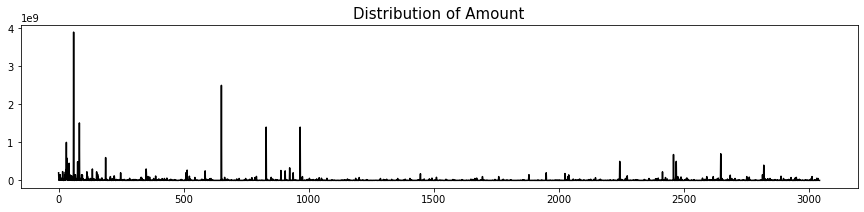

In [11]:
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

dataset["AmountInUSD"] = dataset["AmountInUSD"].apply(lambda x: float(clean_amount(x)))
plt.rcParams['figure.figsize'] = (15, 3)
dataset['AmountInUSD'].plot(kind = 'line', color = 'black')
plt.title('Distribution of Amount', fontsize = 15)
plt.show()

In [12]:
#cleaning the data
dataset['Date'][dataset['Date']=='12/05.2015'] = '12/05/2015'
dataset['Date'][dataset['Date']=='13/04.2015'] = '13/04/2015'
dataset['Date'][dataset['Date']=='15/01.2015'] = '15/01/2015'
dataset['Date'][dataset['Date']=='22/01//2015'] = '22/01/2015'
dataset['Date'][dataset['Date']=='05/072018'] = '05/07/2018'
dataset['Date'][dataset['Date']=='01/07/015'] = '01/07/2015'
dataset['Date'][dataset['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

# How Does the Funding Ecosystem changes with respect to Time?

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201507     98
201606     98
201508     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


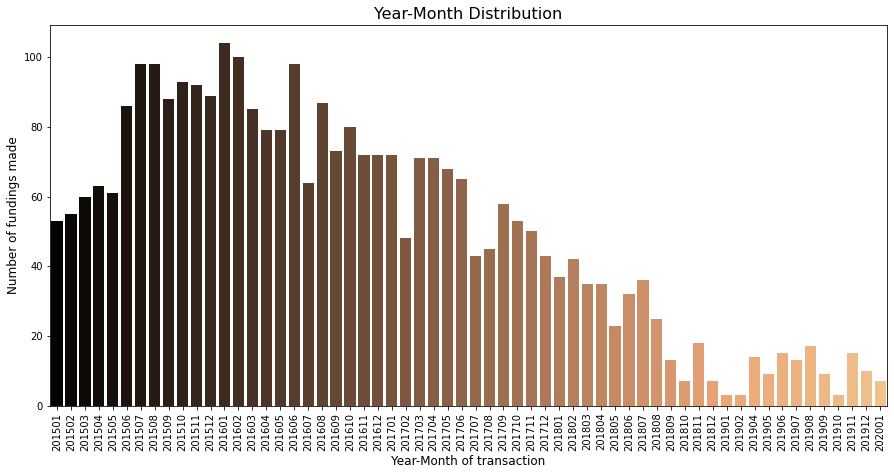

In [13]:
dataset["yearmonth"] = (pd.to_datetime(dataset['Date'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(dataset['Date'],format='%d/%m/%Y').dt.month)


temp = dataset['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = dataset['yearmonth'].value_counts()

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(year_month.index, year_month.values, palette = 'copper')
plt.xticks(rotation = 90)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

# What is the General Amount that Startups get in India?

In [14]:
print("Maximum funding to a Startups is : ", dataset["AmountInUSD"].dropna().sort_values().max())

Maximum funding to a Startups is :  3900000000.0


In [16]:
@interact
def check(column = 'AmountInUSD', x = 500000000): # 50 crore funding of startups
    return dataset[dataset[column] > x].sort_values(by = 'AmountInUSD', ascending = False)

interactive(children=(Text(value='AmountInUSD', description='column'), IntSlider(value=500000000, description=…

In [17]:
dataset[dataset.StartupName == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,nan,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,nan,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,nan,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,nan,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,Late Stage (Alibaba @ 40% equity),201509
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,-9.990000e+02,More details,201503
2948,2949,05/02/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,-9.990000e+02,Strategic Investment (25% stake),201502


In [18]:
dataset[dataset.StartupName == 'Flipkart']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,yearmonth
651,652,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,nan,201708
773,774,26/06/2017,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+07,nan,201706
966,967,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,nan,201703
1032,1033,20/02/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+07,nan,201702
2689,2690,04/06/2015,Flipkart,eCommerce platform,nan,Bangalore,Morgan Stanley,Private Equity,5.000000e+07,Late Stage,201506


In [19]:
print("Minimum funding to a Startups is : ", dataset["AmountInUSD"].dropna().sort_values().min())

Minimum funding to a Startups is :  -999.0


In [20]:
dataset[['AmountInUSD','StartupName']].sort_values(by = 'AmountInUSD', ascending = True).head(5)

,AmountInUSD,StartupName
2125,-999.0,Splitkart
1464,-999.0,TAC Security
708,-999.0,FableStreet
709,-999.0,Monsoon Fintech
710,-999.0,MonkeyBox


In [21]:
data[data['AmountInUSD'] == -999.0].shape

(0, 9)

In [22]:
print("On Average indian startups got funding of : ", dataset["AmountInUSD"].dropna().sort_values().mean())

On Average indian startups got funding of :  13270058.261169514


Total startups funded :  2457
Ola Cabs     8
Swiggy       8
Paytm        7
UrbanClap    6
NoBroker     6
Medinfi      6
Nykaa        6
Meesho       6
Jugnoo       5
Grofers      5
Name: StartupName, dtype: int64


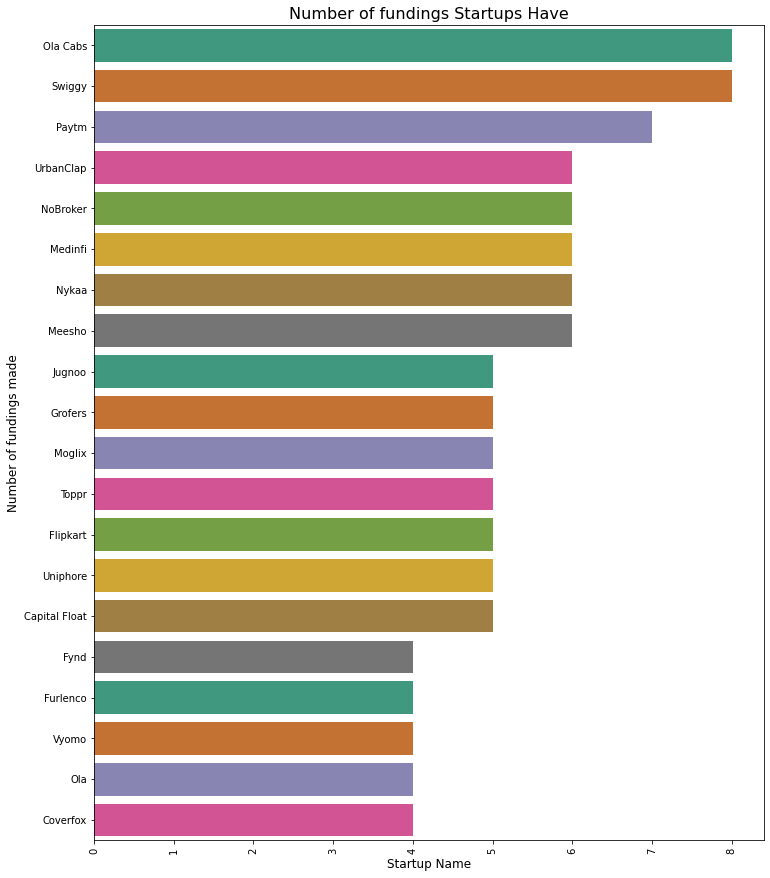

In [23]:
print("Total startups funded : ", len(dataset["StartupName"].unique()))
print(dataset["StartupName"].value_counts().head(10))
startupname = dataset['StartupName'].value_counts().head(20)

# lets plot the data
plt.rcParams['figure.figsize'] = (12, 15)
sns.barplot(y = startupname.index, x = startupname.values, alpha=0.9, palette = 'Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

# Which Kind of Industries are more preferred for Startups?

Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: IndustryVertical, dtype: int64


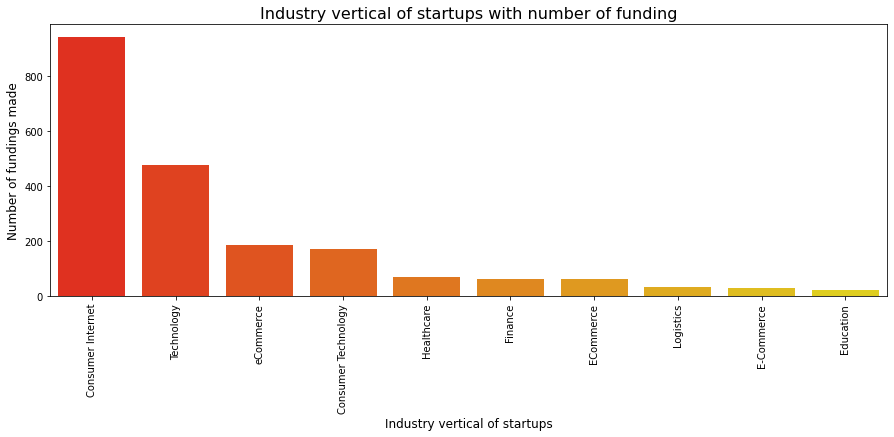

In [24]:
dataset['IndustryVertical'] = dataset['IndustryVertical'].replace('nan', 'Consumer Technology')

industry = dataset['IndustryVertical'].value_counts().head(10)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

Online Lending Platform                          11
Online Pharmacy                                  10
Food Delivery Platform                            8
Online Learning Platform                          5
Online Education Platform                         5
Online Lending                                    5
Online lending platform                           5
Education                                         5
Online Food Delivery                              4
Non-Banking Financial Company                     4
Online Gifting platform                           3
B2B Marketplace                                   3
Online learning platform                          3
Online platform for Higher Education Services     3
Online Payment Gateway                            3
Online Furniture Store                            3
Online Insurance Aggregator                       3
Online Insurance Platform                         3
Agri-tech                                         3
SaaS        

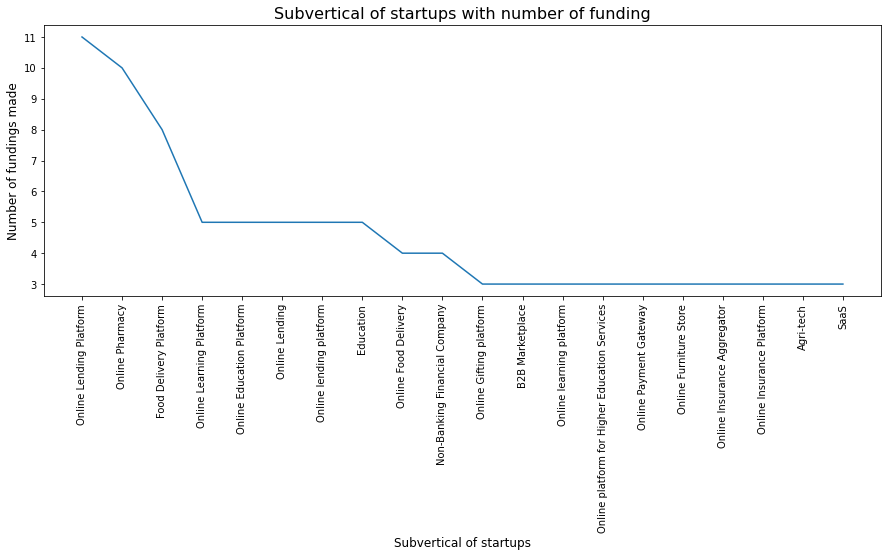

In [25]:
industry = dataset['SubVertical'].value_counts()[1:].head(20)
print(industry)

# lets plot the data
sns.lineplot(industry.index, industry.values, palette = 'winter')
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

# Does Location also play a role, In determining the Growth of a Startup?

Bangalore    1022
Mumbai        568
New Delhi     424
Gurgaon       291
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Gurugram       50
Ahmedabad      38
Name: City, dtype: int64


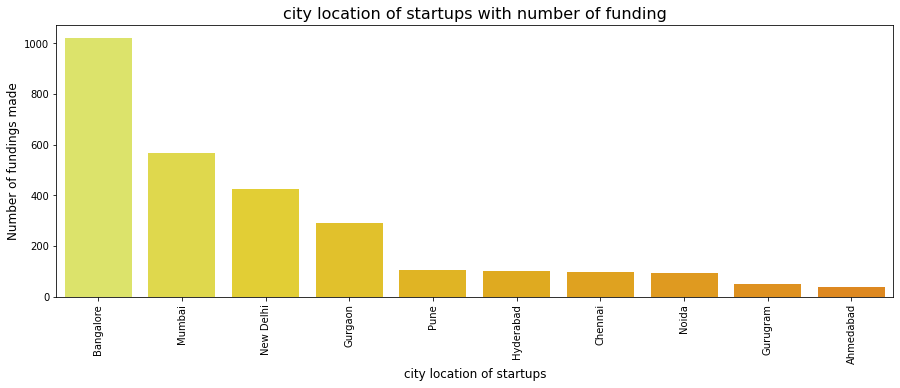

In [26]:
dataset['City'] = dataset['City'].replace(('Bengaluru', 'nan'),('Bangalore', 'Bangalore'))

city = dataset['City'].value_counts().head(10)
print(city)

# lets plot the data
sns.barplot(city.index, city.values, palette = 'Wistia')
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

# Who plays the main role in Indian Startups Ecosystem?

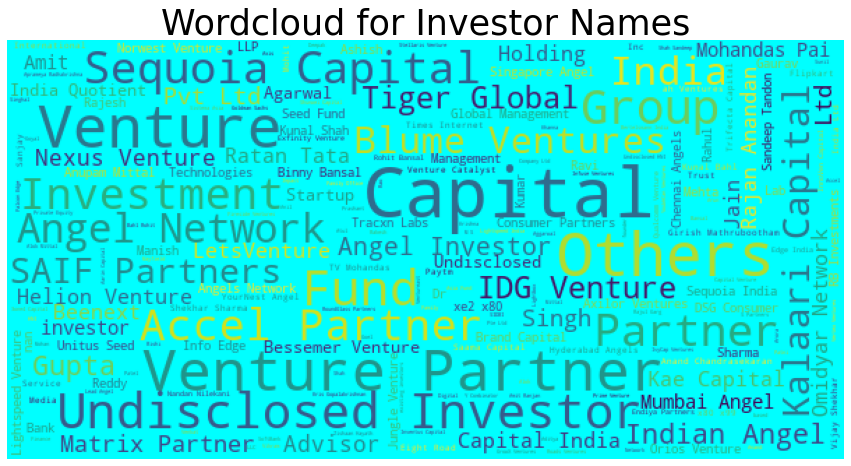

In [29]:
#pip install WordCloud
from wordcloud import WordCloud

names = dataset["InvestorsName"][~pd.isnull(dataset["InvestorsName"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

Undisclosed Investors       136
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Sequoia Capital              15
Group of Angel Investors     15
Accel Partners               12
Venture Catalysts            11
Brand Capital                11
RoundGlass Partners          10
Name: InvestorsName, dtype: int64


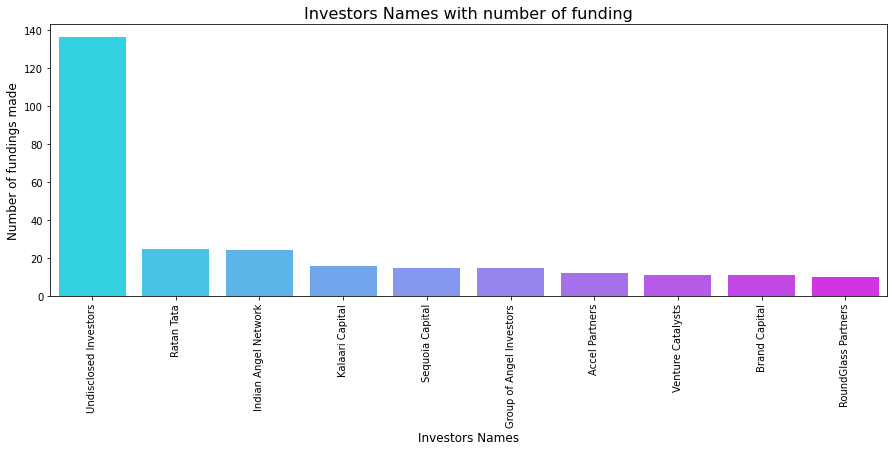

In [30]:
dataset['InvestorsName'][dataset['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
dataset['InvestorsName'][dataset['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
dataset['InvestorsName'][dataset['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
dataset['InvestorsName'][dataset['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
dataset['InvestorsName'][dataset['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
dataset['InvestorsName'][dataset['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
dataset['InvestorsName'][dataset['InvestorsName'] == 'nan'] = 'Undisclosed Investors'

# lets check the value counts
investors = dataset['InvestorsName'].value_counts().head(10)
print(investors)

# lets plot the data
sns.barplot(investors.index, investors.values, palette = 'cool')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

# What are the different Types of Funding for Startups?

Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentType, dtype: int64


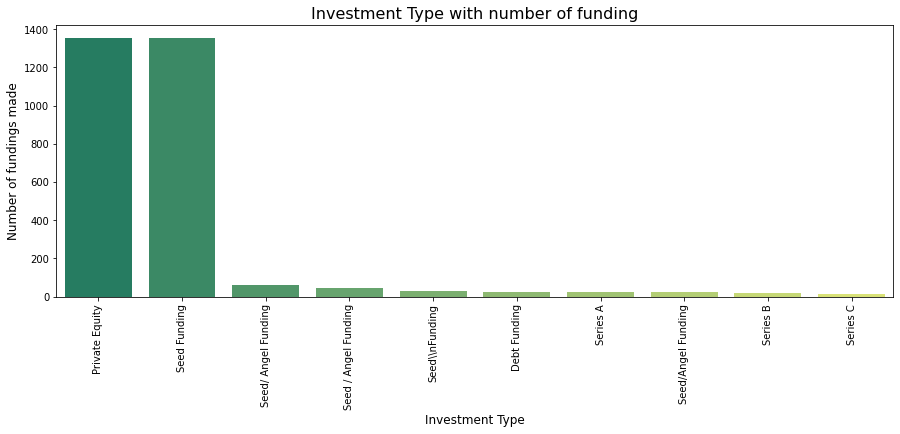

In [31]:
investment = dataset['InvestmentType'].value_counts().head(10)
print(investment)

# lets clean the dataset
dataset['InvestmentType'][dataset['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
dataset['InvestmentType'][dataset['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
dataset['InvestmentType'][dataset['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'

# lets plot the data
sns.barplot(investment.index, investment.values, palette = 'summer')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()